In [ ]:
!gdown 11FrQgGIWTy6rkCii6s-zOyE4IZyadoIo

Downloading...
From: https://drive.google.com/uc?id=11FrQgGIWTy6rkCii6s-zOyE4IZyadoIo
To: /content/train.csv
100% 16.4M/16.4M [00:00<00:00, 29.4MB/s]


In [ ]:
import pandas as pd
df= pd.read_csv('train.csv')
df

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


Before further data exploration, the preliminary step is to check if data is complete and has all the required details. Here, we check basic features of data frame using info() method,


*   Total features - 20
*   Data count - 140700
*   No of numerical columns - 10
*   No of categorical columns - 10

Sufficient details are present for the next stage of data analysis. Let's check if the dataset contains any null values,

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [ ]:
df.isna().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,36630
Academic Pressure,112803
Work Pressure,27918
CGPA,112802


There are some columns that contain large number of null values. We will ignore those that contain less than 10 null values. Here are the columns that need to be fixed,
- Profession
- Academic Pressure
- Work Pressure
- CGPA
- Study Satisfaction
- Job Satisfaction

After analysis using value counts, it looks like the null values are due to two different datasets merged to create this dataset. There are two categories of people this data applies to: Student and Working Professional. Some columns are not applicable for either of these categories and are marked null/NaN. Given this context, let's try to fix the null values for each of these columns

**Fix null values: Profession**

Since we have non null values for column 'Working Professional or Student', let's use this column to check where the people with null 'Profession' belong

In [ ]:
df[df['Profession'].isnull()]['Working Professional or Student'].value_counts()

,count
Working Professional or Student,
Student,27867
Working Professional,8763


Most data with null 'Profession' belong to student. The rest of the null values are from Working Professionals who don't want to give their profession information. For clarity, let's use the following mapping for missing profession,
- if 'Working Professional or Student' = Student, then 'Student'
- else, (keep the same value)

In [ ]:
df.loc[df['Profession'].isnull(), 'Profession']=df[df['Profession'].isnull()].apply(lambda row: 'Student' if row['Working Professional or Student']=='Student' else row['Profession'], axis=1)
df

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


**Fix null values: Academic Pressure**

Since we have non null values for column 'Working Professional or Student', let's use this column to check where the people with null 'Academic Pressure' belong

In [ ]:
df[df['Academic Pressure'].isnull()]['Working Professional or Student'].value_counts()

,count
Working Professional or Student,
Working Professional,112794
Student,9


The results are as expected. The field 'Academic Pressure' is not appliable for Working professionals. That's why we are seeing null values here. For clarity, let's use the following mapping for missing 'Academic Pressure',
- if 'Working Professional or Student' = Working Professional, then 'N/A'
- else, (keep the same value)

In [ ]:
df.loc[df['Academic Pressure'].isnull(), 'Academic Pressure']=df[df['Academic Pressure'].isnull()].apply(lambda row: 'N/A' if row['Working Professional or Student']=='Working Professional' else row['Academic Pressure'], axis=1)
df

<ipython-input-8-257ac1a4783e>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['N/A' 'N/A' 'N/A' ... 'N/A' 'N/A' 'N/A']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Academic Pressure'].isnull(), 'Academic Pressure']=df[df['Academic Pressure'].isnull()].apply(lambda row: 'N/A' if row['Working Professional or Student']=='Working Professional' else row['Academic Pressure'], axis=1)


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,N/A,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,N/A,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,N/A,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,N/A,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,N/A,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,N/A,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,N/A,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,N/A,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


**Fix null values: Work Pressure**

Since we have non null values for column 'Working Professional or Student', let's use this column to check where the people with null 'Work Pressure' belong

In [ ]:
df[df['Work Pressure'].isnull()]['Working Professional or Student'].value_counts()

,count
Working Professional or Student,
Student,27898
Working Professional,20


The results are as expected. The field 'Work Pressure' is not appliable for Students. That's why we are seeing null values here. For clarity, let's use the following mapping for missing 'Work Pressure',
- if 'Working Professional or Student' = Student, then 'N/A'
- else, (keep the same value)

In [ ]:
df.loc[df['Work Pressure'].isnull(), 'Work Pressure']=df[df['Work Pressure'].isnull()].apply(lambda row: 'N/A' if row['Working Professional or Student']=='Student' else row['Work Pressure'], axis=1)
df

<ipython-input-10-3c8b1475be96>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['N/A' 'N/A' 'N/A' ... 'N/A' 'N/A' 'N/A']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Work Pressure'].isnull(), 'Work Pressure']=df[df['Work Pressure'].isnull()].apply(lambda row: 'N/A' if row['Working Professional or Student']=='Student' else row['Work Pressure'], axis=1)


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,N/A,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,N/A,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,N/A,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,N/A,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,N/A,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,N/A,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,N/A,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,N/A,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,N/A,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


**Fix null values: CGPA**

Since we have non null values for column 'Working Professional or Student', let's use this column to check where the people with null 'CGPA' belong

In [ ]:
df[df['CGPA'].isnull()]['Working Professional or Student'].value_counts()

,count
Working Professional or Student,
Working Professional,112793
Student,9


The results are as expected. The field 'CGPA' is not appliable for Working Professionals. That's why we are seeing null values here. For clarity, let's use the following mapping for missing 'CGPA',
- if 'Working Professional or Student' = Working Professional, then 'N/A'
- else, (keep the same value)

In [ ]:
df.loc[df['CGPA'].isnull(), 'CGPA']=df[df['CGPA'].isnull()].apply(lambda row: 'N/A' if row['Working Professional or Student']=='Working Professional' else row['CGPA'], axis=1)
df

<ipython-input-12-0b2b313f9244>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['N/A' 'N/A' 'N/A' ... 'N/A' 'N/A' 'N/A']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['CGPA'].isnull(), 'CGPA']=df[df['CGPA'].isnull()].apply(lambda row: 'N/A' if row['Working Professional or Student']=='Working Professional' else row['CGPA'], axis=1)


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,N/A,5.0,N/A,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,N/A,4.0,N/A,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,N/A,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,N/A,5.0,N/A,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,N/A,1.0,N/A,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,N/A,5.0,N/A,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,N/A,5.0,N/A,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,N/A,3.0,N/A,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,N/A,5.0,N/A,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


**Fix null values: Study Satisfaction**

Since we have non null values for column 'Working Professional or Student', let's use this column to check where the people with null 'Study Satisfaction' belong

In [ ]:
df[df['Study Satisfaction'].isnull()]['Working Professional or Student'].value_counts()

,count
Working Professional or Student,
Working Professional,112793
Student,10


The results are as expected. The field 'Study Satisfaction' is not appliable for Students. That's why we are seeing null values here. For clarity, let's use the following mapping for missing 'Study Satisfaction',
- if 'Working Professional or Student' = Working Professional, then 'N/A'
- else, (keep the same value)

In [ ]:
df.loc[df['Study Satisfaction'].isnull(), 'Study Satisfaction']=df[df['Study Satisfaction'].isnull()].apply(lambda row: 'N/A' if row['Working Professional or Student']=='Working Professional' else row['Study Satisfaction'], axis=1)
df

<ipython-input-14-ca908cd1219a>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['N/A' 'N/A' 'N/A' ... 'N/A' 'N/A' 'N/A']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Study Satisfaction'].isnull(), 'Study Satisfaction']=df[df['Study Satisfaction'].isnull()].apply(lambda row: 'N/A' if row['Working Professional or Student']=='Working Professional' else row['Study Satisfaction'], axis=1)


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,N/A,5.0,N/A,N/A,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,N/A,4.0,N/A,N/A,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,N/A,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,N/A,5.0,N/A,N/A,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,N/A,1.0,N/A,N/A,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,N/A,5.0,N/A,N/A,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,N/A,5.0,N/A,N/A,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,N/A,3.0,N/A,N/A,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,N/A,5.0,N/A,N/A,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


**Fix null values: Job Satisfaction**

Since we have non null values for column 'Working Professional or Student', let's use this column to check where the people with null 'Job Satisfaction' belong

In [ ]:
df[df['Job Satisfaction'].isnull()]['Working Professional or Student'].value_counts()

,count
Working Professional or Student,
Student,27893
Working Professional,17


The results are as expected. The field 'Job Satisfaction' is not appliable for Work Professionals. That's why we are seeing null values here. For clarity, let's use the following mapping for missing 'Job Satisfaction',
- if 'Working Professional or Student' = Student, then 'N/A'
- else, (keep the same value)

In [ ]:
df.loc[df['Job Satisfaction'].isnull(), 'Job Satisfaction']=df[df['Job Satisfaction'].isnull()].apply(lambda row: 'N/A' if row['Working Professional or Student']=='Student' else row['Job Satisfaction'], axis=1)
df

<ipython-input-16-52b4f088b33f>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['N/A' 'N/A' 'N/A' ... 'N/A' 'N/A' 'N/A']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Job Satisfaction'].isnull(), 'Job Satisfaction']=df[df['Job Satisfaction'].isnull()].apply(lambda row: 'N/A' if row['Working Professional or Student']=='Student' else row['Job Satisfaction'], axis=1)


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,N/A,5.0,N/A,N/A,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,N/A,4.0,N/A,N/A,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,N/A,8.97,2.0,N/A,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,N/A,5.0,N/A,N/A,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,N/A,1.0,N/A,N/A,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,N/A,5.0,N/A,N/A,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,N/A,5.0,N/A,N/A,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,N/A,3.0,N/A,N/A,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,N/A,5.0,N/A,N/A,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


Now that we have fixed all valid null values, let's run isna() function to see how may more nulls are left

In [ ]:
df.isna().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,8763
Academic Pressure,9
Work Pressure,20
CGPA,9


Most of the null values are sorted. For most of the columns, the left over nulls are insignicant and can be dropped. Although Profession has substantial number of nulls(8763), compared to total records(140700), it's less than 10% of records. So, let's drop all rows with any null value

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131914 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     131914 non-null  int64  
 1   Name                                   131914 non-null  object 
 2   Gender                                 131914 non-null  object 
 3   Age                                    131914 non-null  float64
 4   City                                   131914 non-null  object 
 5   Working Professional or Student        131914 non-null  object 
 6   Profession                             131914 non-null  object 
 7   Academic Pressure                      131914 non-null  object 
 8   Work Pressure                          131914 non-null  object 
 9   CGPA                                   131914 non-null  object 
 10  Study Satisfaction                     131914 non-null  objec

After dropping null values, we have **131914** records for further analysis

**Outlier detection and treatment.**

---


Along with checking for null values, we should also detect any outlier values present in different columns in data. Depending on the column and how many outliers are present, we might or might not need to fix for outliers.

Here, for detecting outliers, we use a simple visualization technique called boxplot. The boxplot gives descriptive information on a column including the mean, median, 25 percentile, 50 percentile and 75 percentile. Along with this, It also plots the outliers(if any) on the positive and negative side

For our data, we will plot boxplots for valid numerical columns(Age, Work/Study Hours, Financial Stress). The other numerical columns are actually categorical columns(Depression) or not useful for analysis(id)


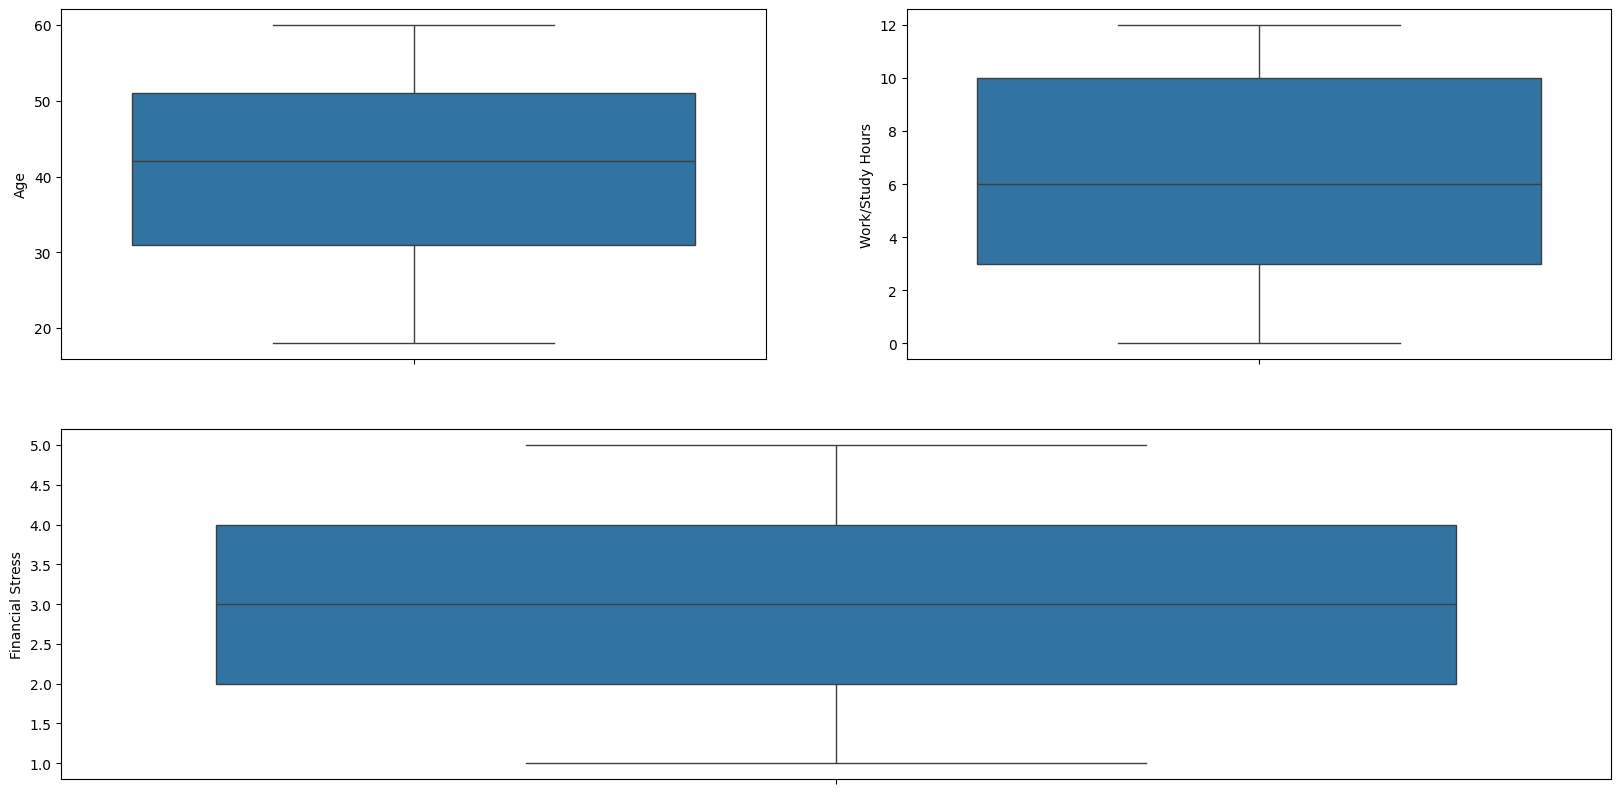

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.boxplot(df['Age'])

plt.subplot(2,2,2)
sns.boxplot(df['Work/Study Hours'])

plt.subplot(2,1,2)
sns.boxplot(df['Financial Stress'])
plt.show()

**Observations**
- All three columns are free of outliers
- So, no treatment is required with respect to outliers

**Statistical Summary**

In [ ]:
df[['Age','Work/Study Hours', 'Financial Stress']].describe()

,Age,Work/Study Hours,Financial Stress
count,131914.000000,131914.000000,131914.000000
mean,41.088497,6.240801,2.979502
std,11.965150,3.856340,1.412187
min,18.000000,0.000000,1.000000
25%,31.000000,3.000000,2.000000
50%,42.000000,6.000000,3.000000
75%,51.000000,10.000000,4.000000
max,60.000000,12.000000,5.000000


**Univariate Analysis: Categorical Columns**

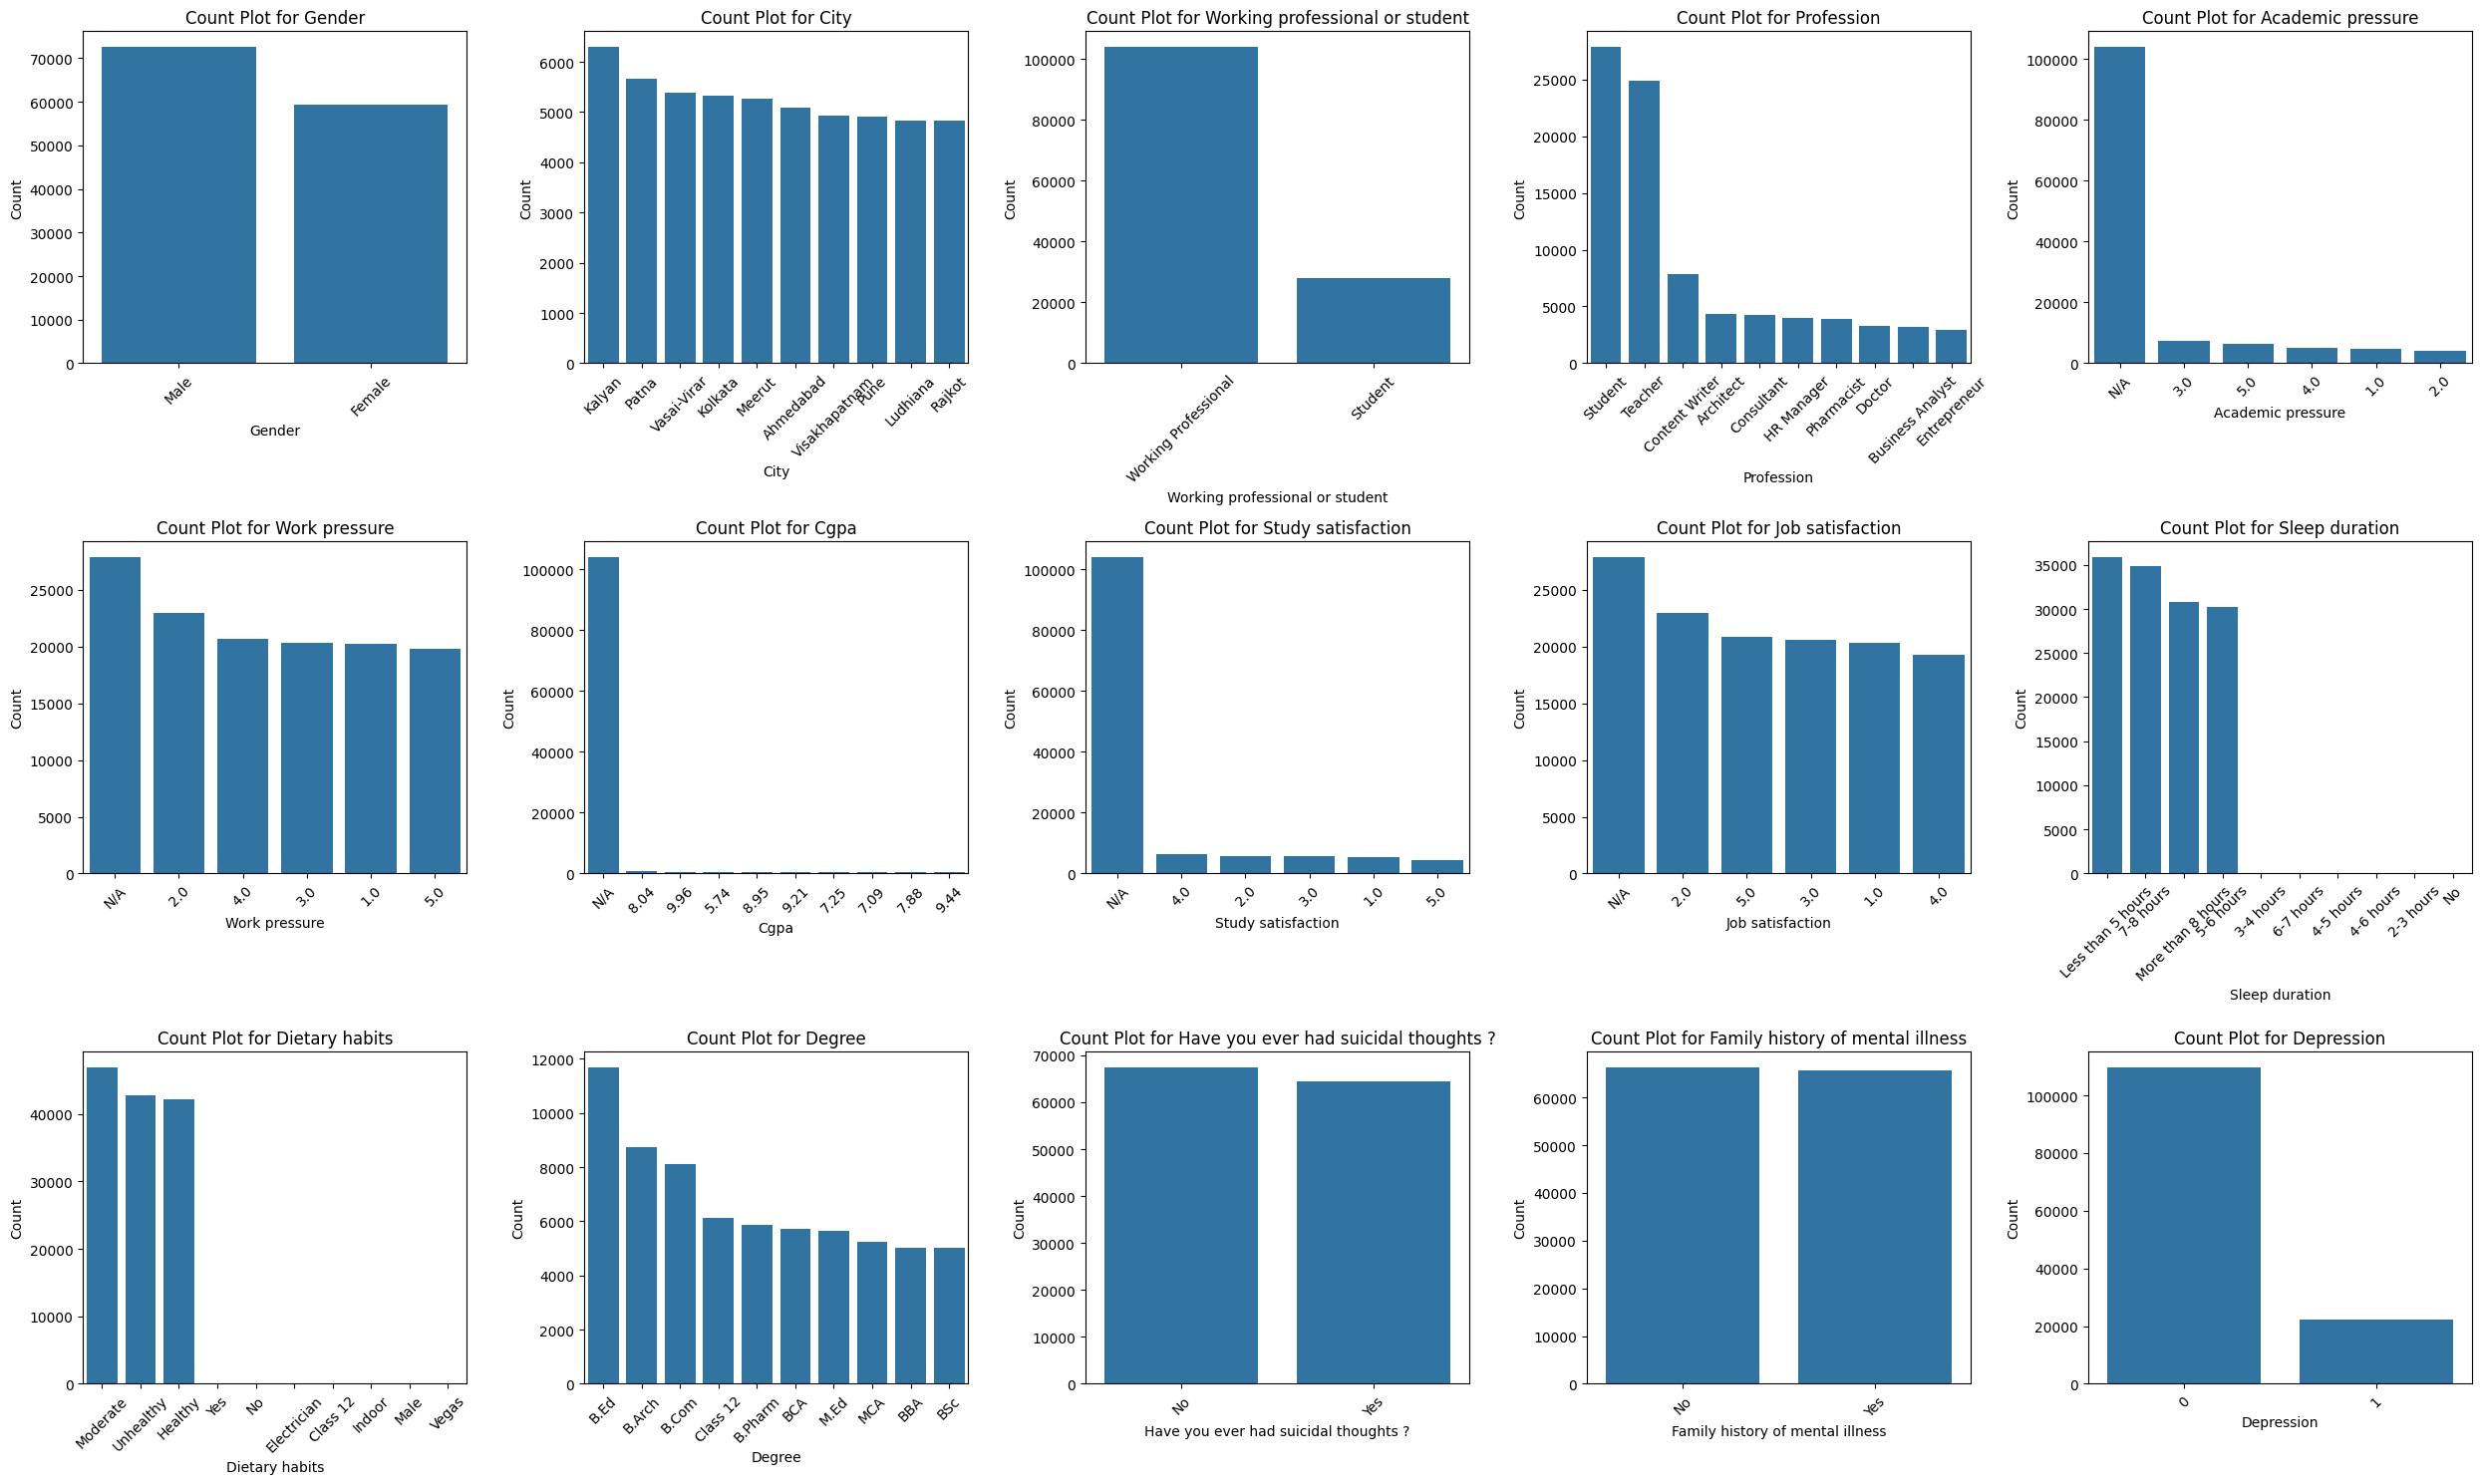

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
categorical_columns = ['Gender', 'City', 'Working Professional or Student', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits','Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, order=df[col].value_counts().head(10).index, ax=axes[i])
    axes[i].set_title(f'Count Plot for {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Observations**
- There are more number of males than females in the dataset. We will take this into consideration for our later analysis
- The data is diverse and distributed in terms of cities from which it was collected. There is no heavy concentration on any particular city
- The data is more skewed towards working professionals as more than 80% of the surveyed people belong to this category. The rest of the data is from Students(~20%)
- With regards to Profession, Teachers are a substantial category with a count of around 25000
- Academic pressure(only applicable for students) follows an average trend line with 3.0 being the most chosen value
- Work pressure(only applicable for working professionals) is trending lower than average with 2.0 being the most chosen value. This indicates work pressure might not be so concerning
- CGPA(only applicable for students) is continuous in nature and is not indicated properly in the count plot. We will use histogram for any analysis of this feature(if required)
- Job satisfaction(only applicable for working professionals) trends on the lower side(2.0) which indicates that most people are not satisfied with their jobs.
- On sleep, significant number of people(almost 1/4th) sleep less than 5 hours. This could be a strong factor affecting one's mental health as the sleep time is far less than the average recommended hours(>8 hours)
- Almost 1/3rd of people have categorized their dietary habits as unhealthy. This generally has a direct contributing effect on one's mental health
- A high number of degree holders have completed B.Ed. This correlates with previous finding that teachers form a significant chunk of the data
- Half of the survey respondents have indicated that they have had suicidal thoughts. This is concerning and is a strong indicator for depression
- Similarly, close to half of the survey respondents have atleast one member in their family affected by mental illness. This too is a strong indicator for depression
- Count plot for Depression indicates that most people are not affected by Depression. But it has a healthy number of positive cases(~20000) to be able to develop rich features for ML models.

**Univariate Analysis: Numerical Columns**

Distribution of Numerical columns

From our previous analysis, we find that CGPA column is numerical in nature if N/A(data from working professionals) are removed. We will plot histogram for CGPA excluding the N/A values

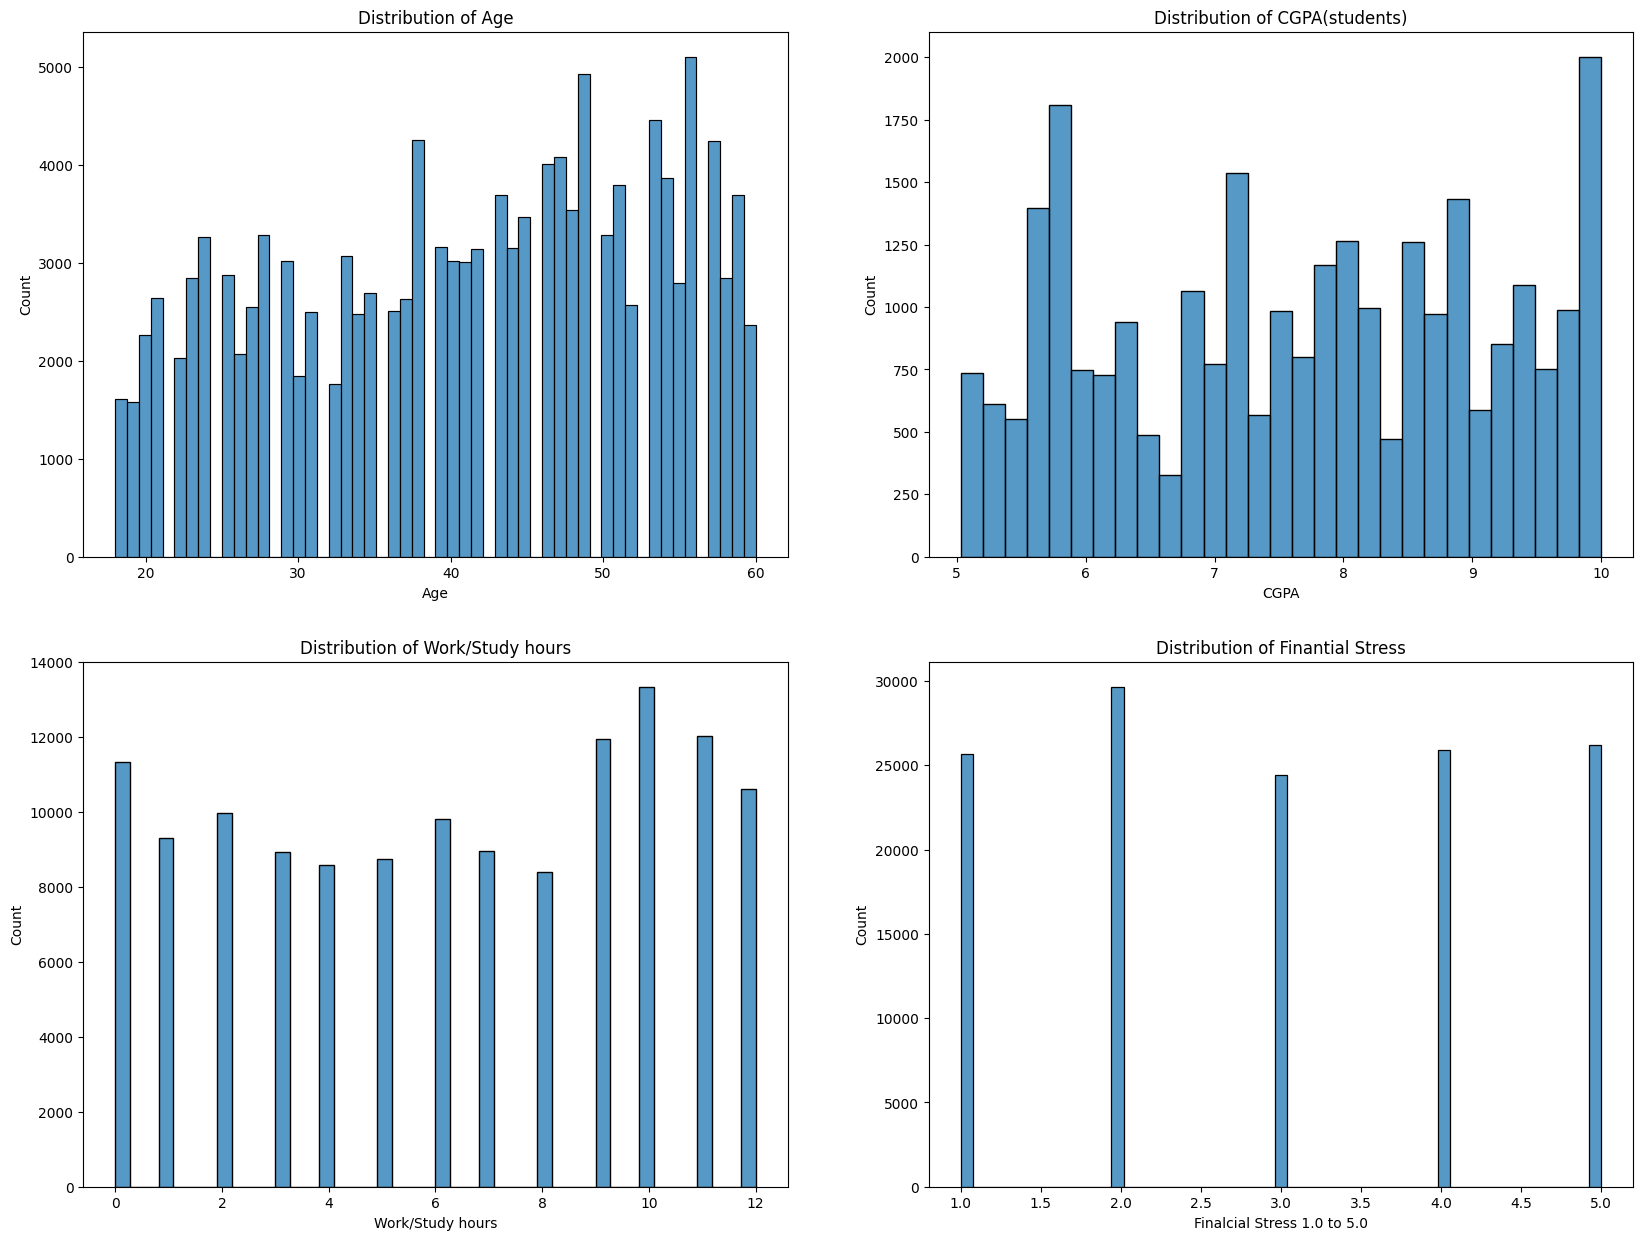

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a new transformed column
cgpa_numeric = pd.to_numeric(df['CGPA'], errors='coerce')

# Filter out NaN values (originally strings like "N/A")
filtered_cgpa = cgpa_numeric.dropna()

fig = plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.histplot(df['Age']).set(title="Distribution of Age", xlabel='Age', ylabel='Count')

plt.subplot(2,2,2)
sns.histplot(filtered_cgpa).set(title="Distribution of CGPA(students)", xlabel='CGPA', ylabel='Count')

plt.subplot(2,2,3)
sns.histplot(df['Work/Study Hours']).set(title="Distribution of Work/Study hours", xlabel='Work/Study hours', ylabel='Count')

plt.subplot(2,2,4)
sns.histplot(df['Financial Stress']).set(title="Distribution of Finantial Stress", xlabel='Finalcial Stress 1.0 to 5.0', ylabel='Count')

plt.show()

**Observations**
1. Distribution of Age: The distribution appears to be roughly uniform across age groups, with slightly higher counts in the 40–60 age range. This could indicate a relatively balanced dataset in terms of age demographics, with a slight skew towards middle-aged individuals.
2. Distribution of CGPA (Students): The CGPA distribution is not uniform, with peaks at certain CGPA values (e.g., 6, 10). This suggests that some CGPA values are more common, which could be influenced by grading practices or thresholds used for evaluation in the educational system.
3. Distribution of Work/Study Hours: The distribution shows a clear peak at the higher range (around 10–12 hours). This indicates that a significant portion of individuals spend a high amount of time working or studying, which might point to a demanding work or educational environment.
4. Distribution of Financial Stress: The distribution is fairly even across the financial stress levels (1 to 5). This suggests that financial stress is distributed evenly among the population, with no single level dominating. It may also indicate a diverse population experiencing a range of financial stress levels.

Further Data Cleansing:
Although our dataset is free of null values, the count plots along with analysis using value_counts() indicates that some columns have invalid values(For example, city-M.com). We will use the following rule to remove invalid values,
- Remove rows that have values with value_counts < 15
- Exclude 'Name', 'CGPA' from categorical filtering as these columns can have valid values with frequency < 15

In [ ]:
df = df[
    df.drop(columns=['Name','CGPA']) # Exclude 'Name', 'CGPA' from categorical filtering
    .select_dtypes(include=['object', 'category'])  # Select categorical columns
    .apply(lambda col: col.map(col.value_counts()) >= 15)
    .all(axis=1)  # Keep rows where all conditions are met across categorical columns
]
df

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,N/A,5.0,N/A,N/A,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,N/A,4.0,N/A,N/A,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,N/A,8.97,2.0,N/A,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,N/A,5.0,N/A,N/A,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,N/A,1.0,N/A,N/A,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140694,140694,Ishaani,Female,45.0,Ahmedabad,Working Professional,Teacher,N/A,2.0,N/A,N/A,5.0,Less than 5 hours,Moderate,B.Ed,Yes,1.0,5.0,No,0
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,N/A,5.0,N/A,N/A,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,N/A,3.0,N/A,N/A,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,N/A,5.0,N/A,N/A,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [ ]:
# Display value_counts for all categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])  # Select categorical columns

for col in categorical_columns.columns:
    print(f"Value counts for column '{col}':")
    print(categorical_columns[col].value_counts())
    print("-" * 50)  # Separator for readability

Value counts for column 'Name':
Name
Rohan       3040
Aarav       2206
Rupak       2110
Anvi        1891
Aaradhya    1848
            ... 
Rieta          1
Zahra          1
Jathesh        1
Jhav           1
Aarun          1
Name: count, Length: 411, dtype: int64
--------------------------------------------------
Value counts for column 'Gender':
Gender
Male      72379
Female    59191
Name: count, dtype: int64
--------------------------------------------------
Value counts for column 'City':
City
Kalyan           6287
Patna            5652
Vasai-Virar      5377
Kolkata          5315
Meerut           5261
Ahmedabad        5087
Visakhapatnam    4921
Pune             4899
Ludhiana         4826
Rajkot           4821
Srinagar         4804
Mumbai           4695
Indore           4449
Surat            4399
Varanasi         4327
Agra             4289
Hyderabad        4239
Jaipur           4156
Kanpur           4155
Vadodara         4102
Lucknow          4050
Nagpur           3921
Thane          

**Bivariate Analysis: Categorical Columns**

Let's visually understand a few features and derive insights from it

To start with,
1. What is the gender split up of people with depression

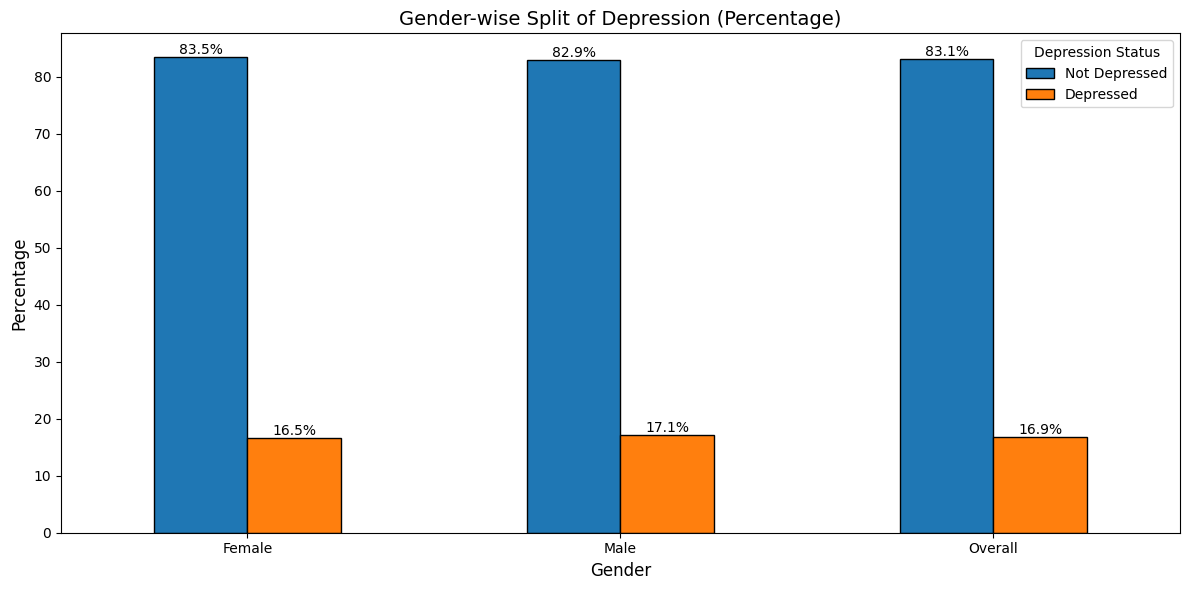

In [ ]:
gender_depression_percentages= df.groupby('Gender')['Depression'].value_counts(normalize=True).unstack() * 100

# Calculate overall percentages for depression
overall_depression_percentages = df['Depression'].value_counts(normalize=True) * 100

# Add a row for "Overall" to the gender-specific percentages
gender_depression_percentages.loc['Overall'] = overall_depression_percentages

# Plot the data
ax = gender_depression_percentages.plot(kind='bar', figsize=(12, 6), edgecolor='black')

# Add percentages on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)
# Customize the plot
plt.title("Gender-wise Split of Depression (Percentage)", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.legend(["Not Depressed", "Depressed"], title="Depression Status", fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

Observations
- From this data, we can postulate that men are more likely to be depressed than women. Although, it should be noted that the difference is marginal(0.6%)
- Because of the marginal difference, we can say that prevalence of depression is almost evenly distributed between genders in this dataset
- So, gender alone does not influence the prevalence of depression

2. Does a person's age contribute to depression?

<ipython-input-27-0c6b3499473d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
<ipython-input-27-0c6b3499473d>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_depression_percentages = df.groupby('AgeGroup')['Depression'].value_counts(normalize=True).unstack() * 100


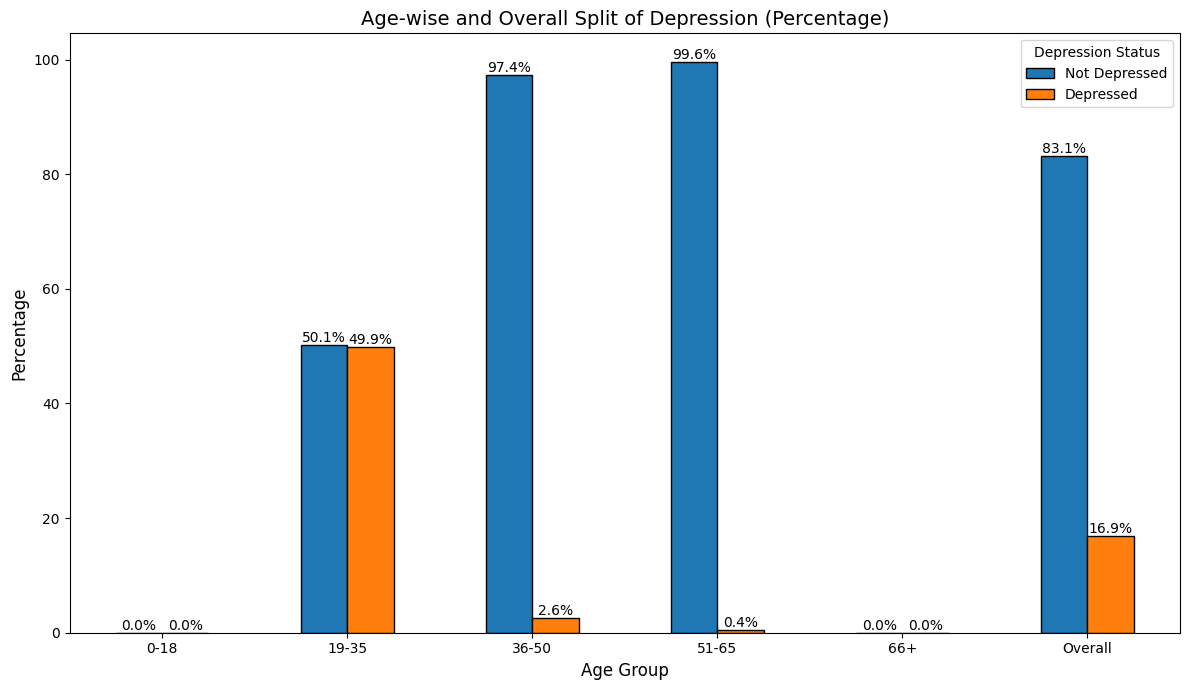

In [ ]:
# Define age groups
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66+']

# Create an 'AgeGroup' column
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate percentages by age groups
age_depression_percentages = df.groupby('AgeGroup')['Depression'].value_counts(normalize=True).unstack() * 100

# Calculate overall percentages for depression
overall_depression_percentages = df['Depression'].value_counts(normalize=True) * 100

# Add a row for "Overall" to the age-specific percentages
age_depression_percentages.loc['Overall'] = overall_depression_percentages

# Plot the data
ax = age_depression_percentages.plot(kind='bar', figsize=(12, 7), edgecolor='black')

# Add percentages on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)

# Customize the plot
plt.title("Age-wise and Overall Split of Depression (Percentage)", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.legend(["Not Depressed", "Depressed"], title="Depression Status", fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df['AgeGroup'].value_counts()

,count
AgeGroup,
36-50,51146
19-35,41548
51-65,38876
0-18,0
66+,0


Let's also analyze the age wise split using histogram

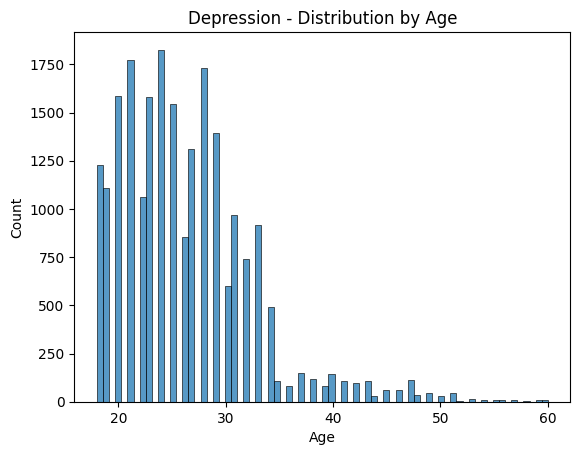

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

depressed_age_wise = df[df['Depression'] == 1]['Age']

sns.histplot(depressed_age_wise).set(title="Depression - Distribution by Age", xlabel='Age', ylabel='Count')
plt.show()

Observations
- People belonging to age group 19-35 have high rate of depression (49.9%) compared to other age groups
- This age group includes the majority of students and working professionals in early or mid career
- So, age does seem to have a contributory effect on a person's mental health

3. Does location of a person contribute to depression?

In [ ]:
df['City'].value_counts()

,count
City,
Kalyan,6287
Patna,5652
Vasai-Virar,5377
Kolkata,5315
Meerut,5261
Ahmedabad,5087
Visakhapatnam,4921
Pune,4899
Ludhiana,4826


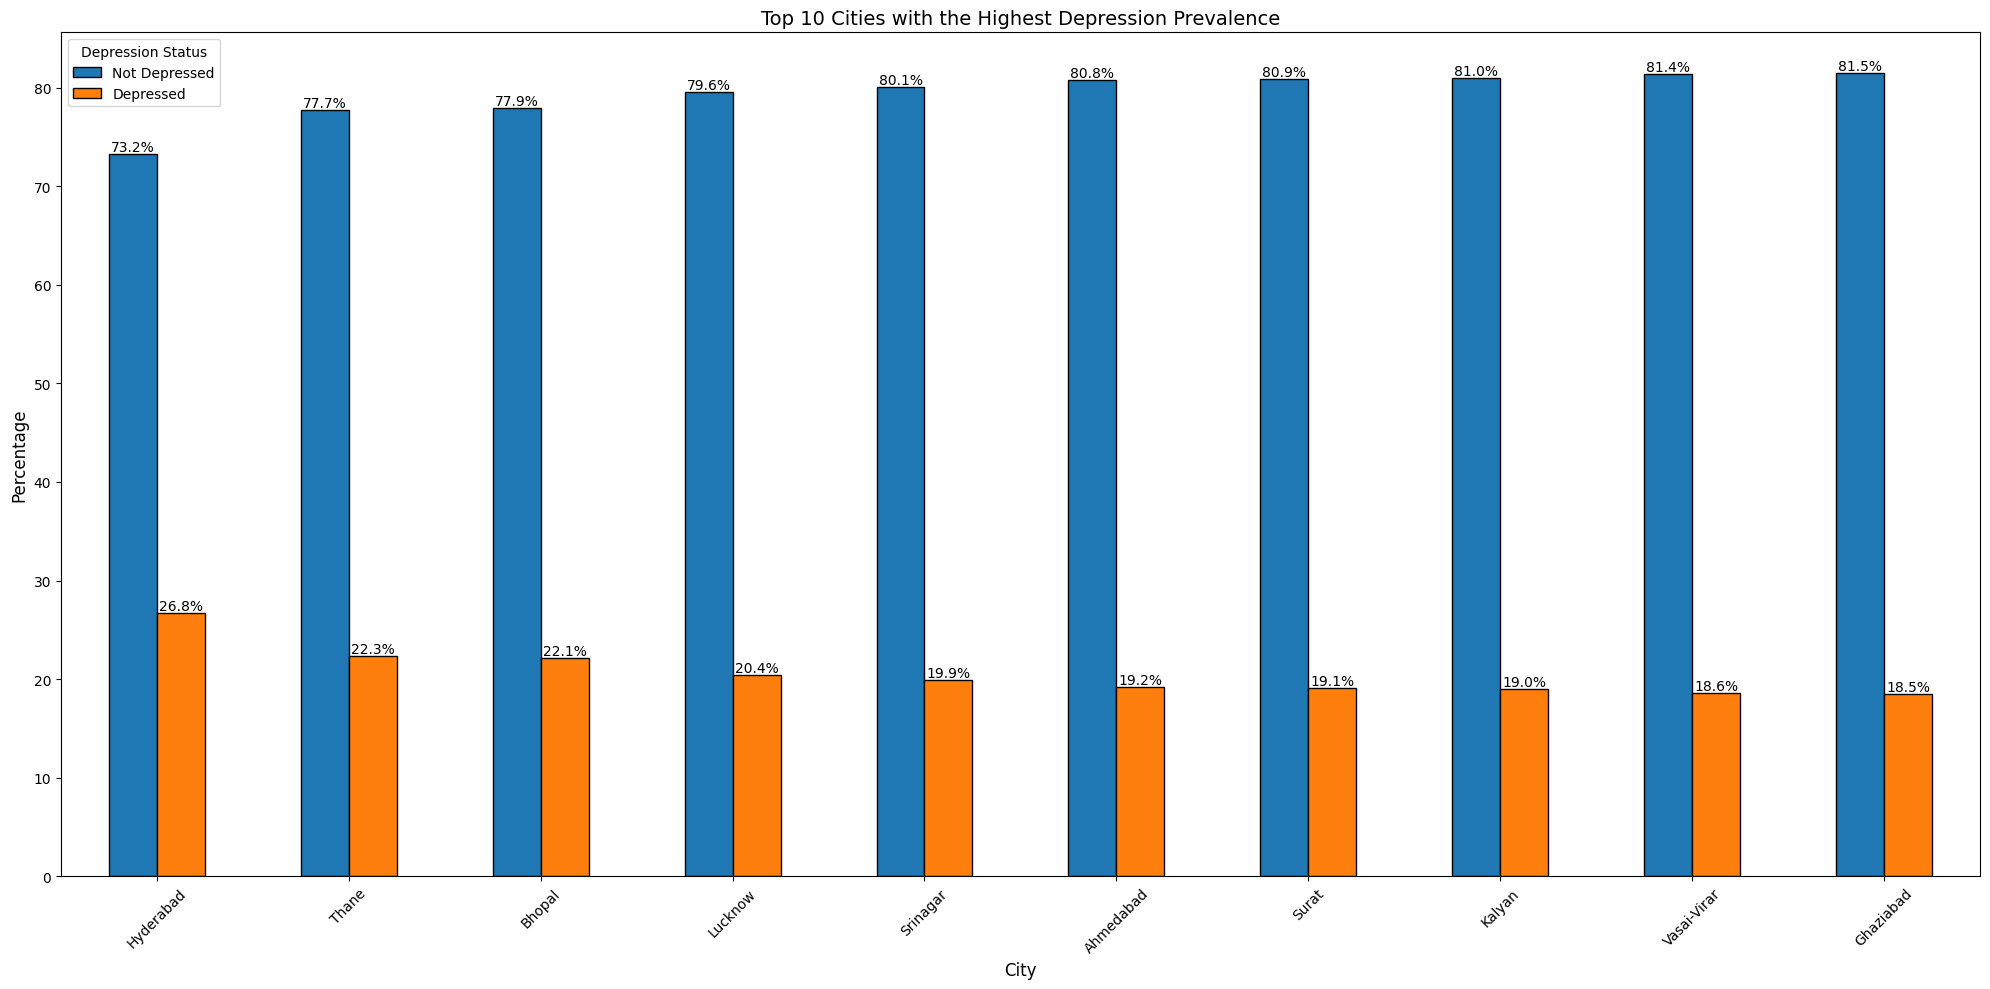

In [ ]:
# Calculate percentages by city
city_depression_percentages = df.groupby('City')['Depression'].value_counts(normalize=True).unstack() * 100

# Calculate overall percentages for depression
overall_depression_percentages = df['Depression'].value_counts(normalize=True) * 100

# Add a row for "Overall" to the city-specific percentages
city_depression_percentages.loc['Overall'] = overall_depression_percentages

# Get the top 10 cities with the highest percentage of depressed individuals
top_cities_highest_depression = city_depression_percentages.sort_values(by=1, ascending=False).head(10)

# Plot only these cities
ax = top_cities_highest_depression.plot(kind='bar', figsize=(20, 10), edgecolor='black')

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)

# Customize the plot
plt.title("Top 10 Cities with the Highest Depression Prevalence", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.legend(["Not Depressed", "Depressed"], title="Depression Status", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

plt.show()

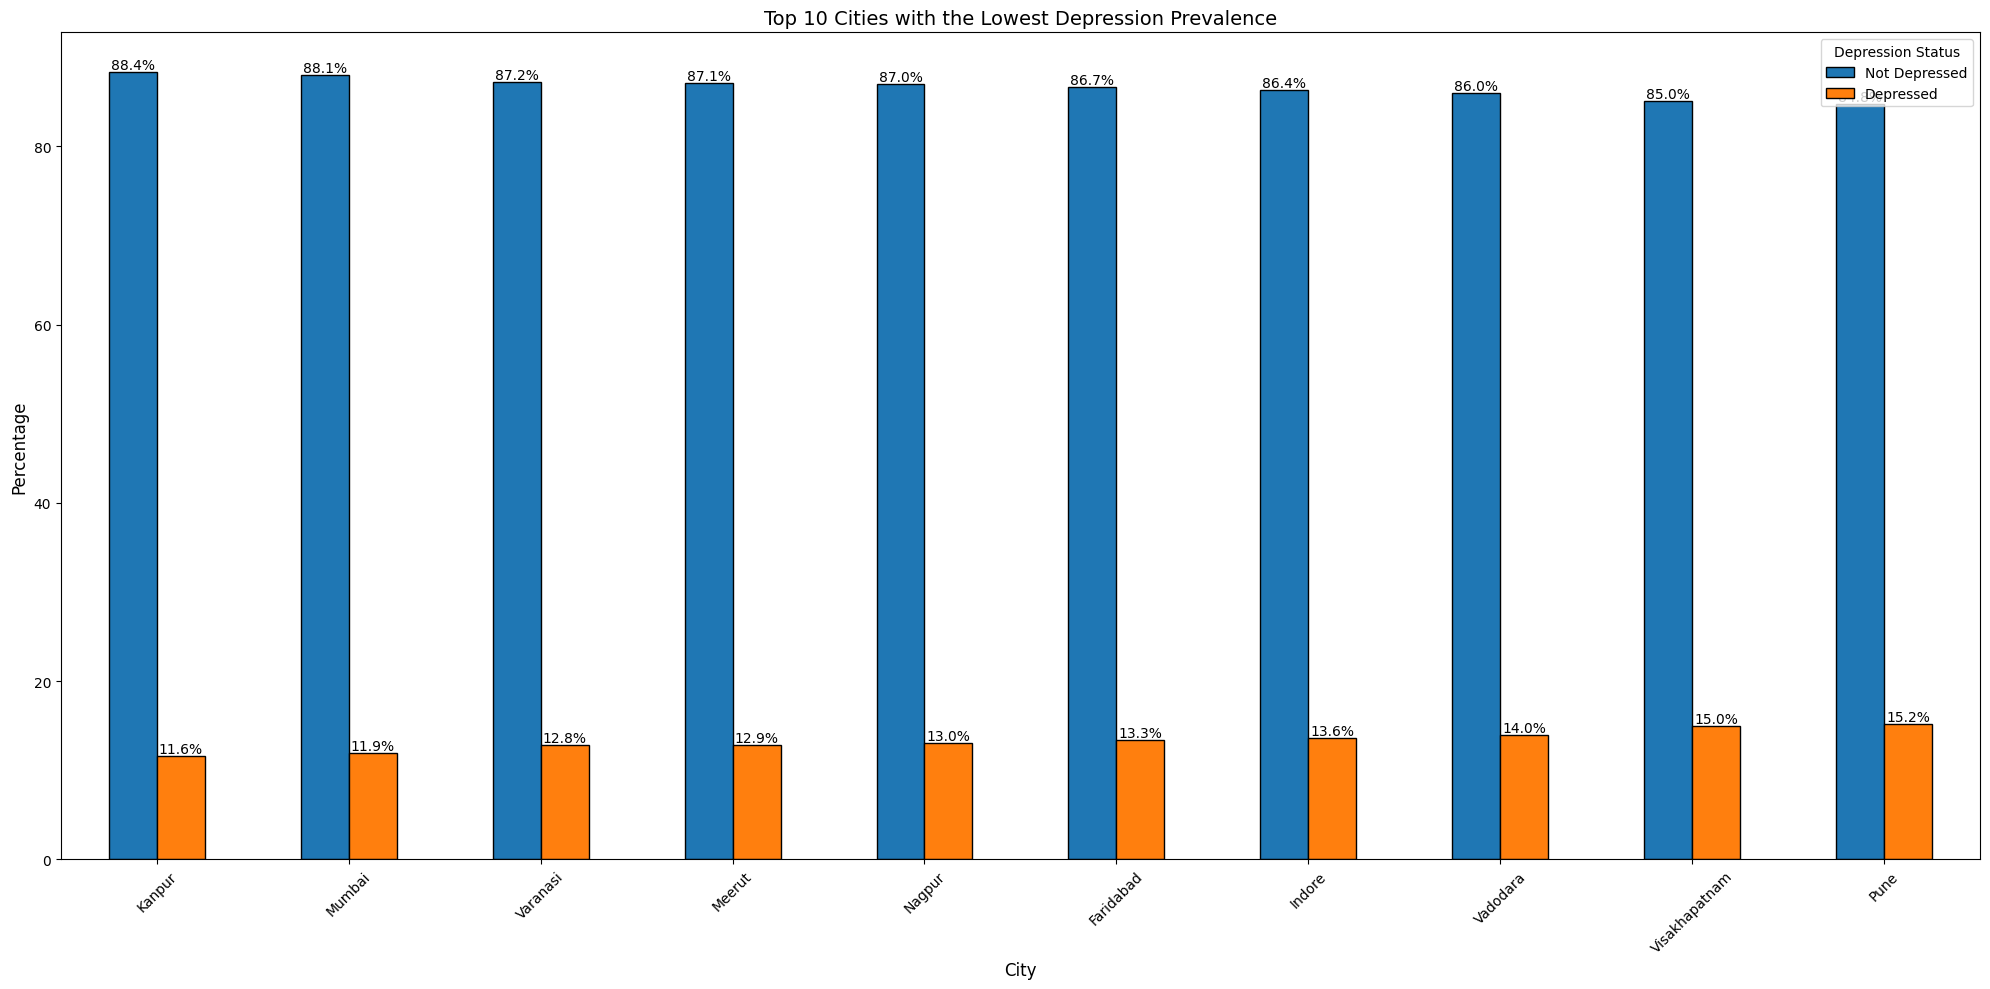

In [ ]:
# Get the top 10 cities with the lowest percentage of depressed individuals
top_cities_lowest_depression = city_depression_percentages.sort_values(by=1, ascending=True).head(10)

# Plot only these cities
ax = top_cities_lowest_depression.plot(kind='bar', figsize=(20, 10), edgecolor='black')

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)

# Customize the plot
plt.title("Top 10 Cities with the Lowest Depression Prevalence", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.legend(["Not Depressed", "Depressed"], title="Depression Status", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

plt.show()

Observations
- There is significant differences between cities when it comes to people affected by depression
- Hyderabad, Thane and Bhopal are top 3 in terms of percentage of people affected by depression
- Kanpur, Mumbai and Varanasi have low percentage of people affected by depression

4. Do people belonging to certain profession more/less likely to be depressed?

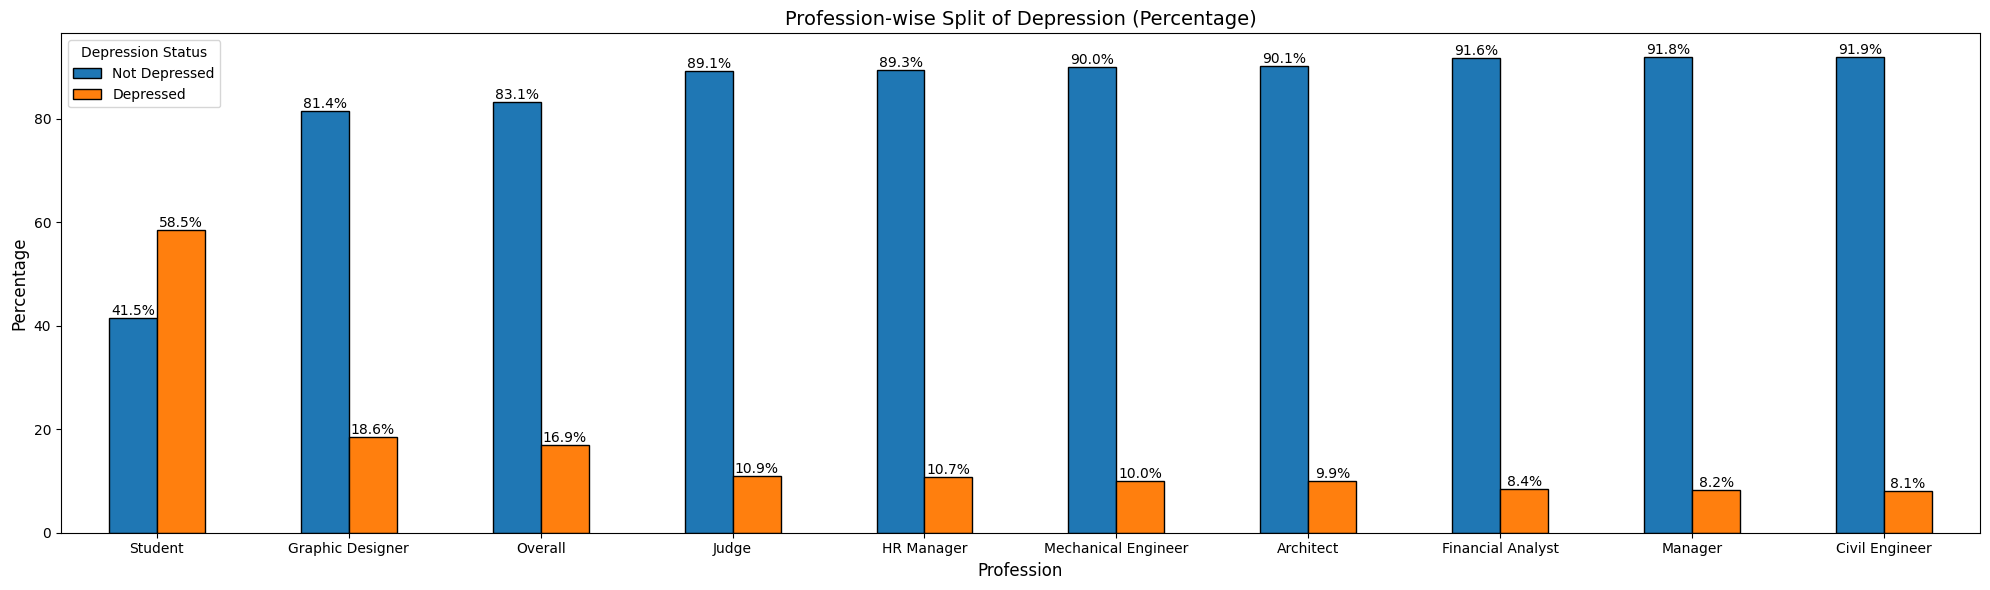

In [ ]:
profession_depression_percentages= df.groupby('Profession')['Depression'].value_counts(normalize=True).unstack() * 100

# Calculate overall percentages for depression
overall_depression_percentages = df['Depression'].value_counts(normalize=True) * 100

# Add a row for "Overall" to the profession-specific percentages
profession_depression_percentages.loc['Overall'] = overall_depression_percentages

# Get the top 10 professions with the highest percentage of depressed individuals
top_professions_highest_depression = profession_depression_percentages.sort_values(by=1, ascending=False).head(10)

# Plot the data
ax = top_professions_highest_depression.plot(kind='bar', figsize=(20, 6), edgecolor='black')

# Add percentages on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)
# Customize the plot
plt.title("Profession-wise Split of Depression (Percentage)", fontsize=14)
plt.xlabel("Profession", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.legend(["Not Depressed", "Depressed"], title="Depression Status", fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df['Profession'].value_counts()

,count
Profession,
Student,27766
Teacher,24869
Content Writer,7803
Architect,4359
Consultant,4217
HR Manager,4010
Pharmacist,3882
Doctor,3249
Business Analyst,3151


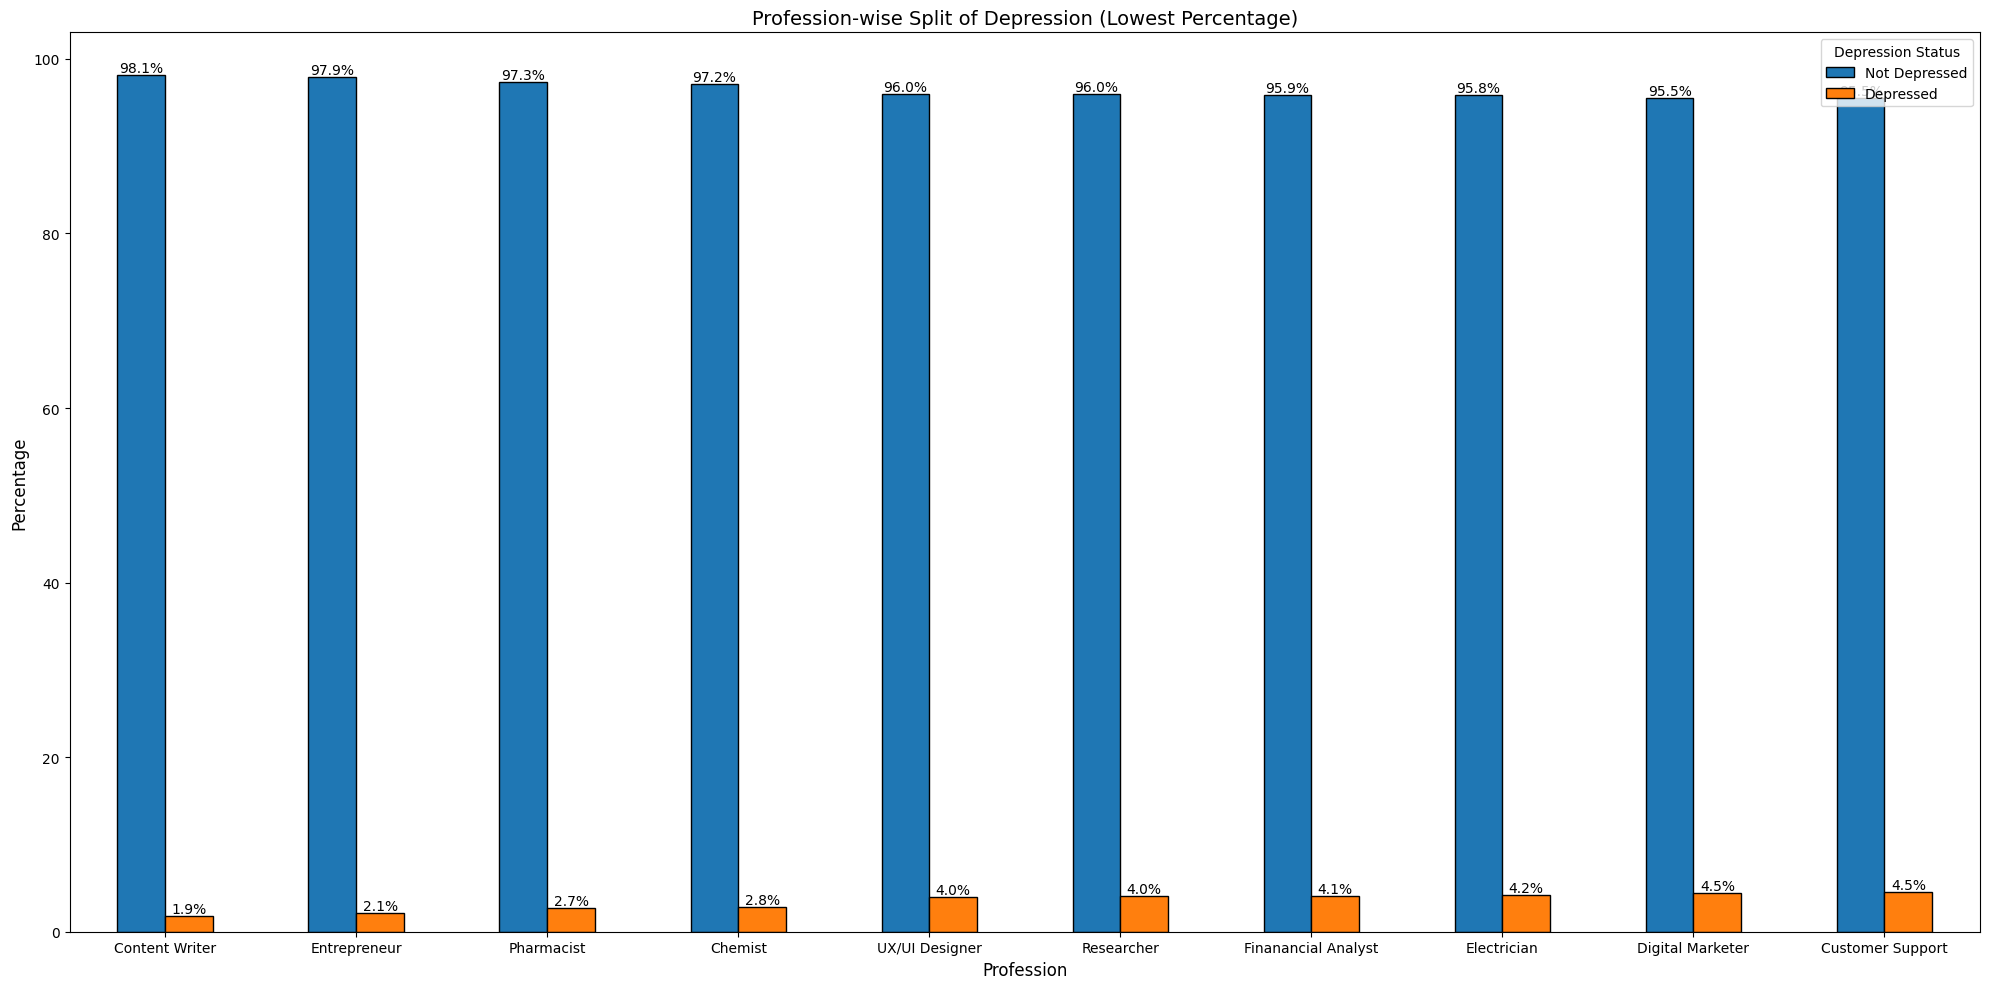

In [ ]:
# Get the top 10 professions with the lowest percentage of depressed individuals
top_professions_lowest_depression = profession_depression_percentages.sort_values(by=1, ascending=True).head(10)

# Plot the data
ax = top_professions_lowest_depression.plot(kind='bar', figsize=(20, 10), edgecolor='black')

# Add percentages on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)

# Customize the plot
plt.title("Profession-wise Split of Depression (Lowest Percentage)", fontsize=14)
plt.xlabel("Profession", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.legend(["Not Depressed", "Depressed"], title="Depression Status", fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

Observations
- Among Working Professionals and Students, Students are clearly more depressed with overwhelming majority(58.5%) being depressed
- Among Working Professionals, there seems to be some difference in rates of depression based on the Profession one belongs
- Graphic designers have high rates of depression(18.5%). But given that the sample size is low, we cannot take this result as conclusive
- Content Writers have lowest rates of depression(1.9%). The sample size is large for this Profession - 7803. So, this result can be taken with high confidence level. It could be that the profession has flexibility in terms of work time and therefore people are more satisfied and less depressed
- The results for one other profession is also interesting. Entrepreneurs are not depressed as much. These people are highly motivated and have passion and motivation. Could this be playing a role in low rates of depression seen?

**Working Professionals vs Students**

Some columns are applicable for only Students/Working Professionals. So, let's segregate and analyze them separately

In [42]:
# Split the data into Students and Working Professionals
students_data = df[df['Working Professional or Student'] == 'Student']
working_professionals_data = df[df['Working Professional or Student'] == 'Working Professional']

**Students**

In [43]:
# Describe the distribution of academic-related metrics
students_analysis = students_data[['Academic Pressure', 'CGPA', 'Study Satisfaction']].describe()
print(students_analysis)

        Academic Pressure      CGPA  Study Satisfaction
count             27793.0  27793.00             27793.0
unique                5.0    331.00                 5.0
top                   3.0      8.04                 4.0
freq               7431.0    819.00              6338.0


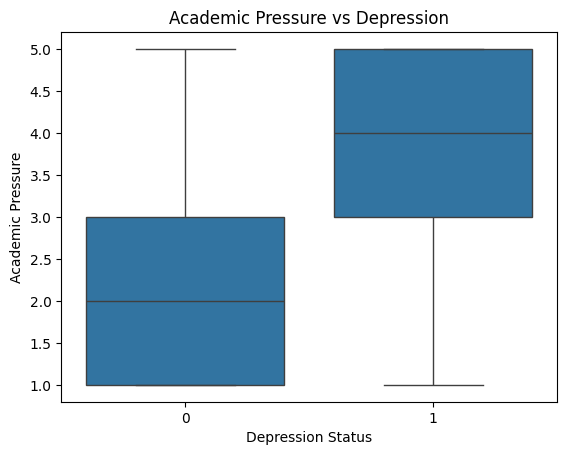

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Depression', y='Academic Pressure', data=students_data)
plt.title("Academic Pressure vs Depression")
plt.xlabel("Depression Status")
plt.ylabel("Academic Pressure")
plt.show()

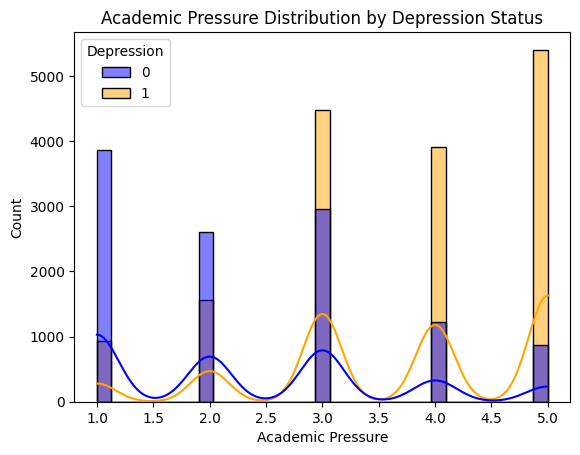

In [57]:
sns.histplot(data=students_data, x='Academic Pressure', hue='Depression', kde=True, palette=['blue', 'orange'])
plt.title("Academic Pressure Distribution by Depression Status")
plt.show()

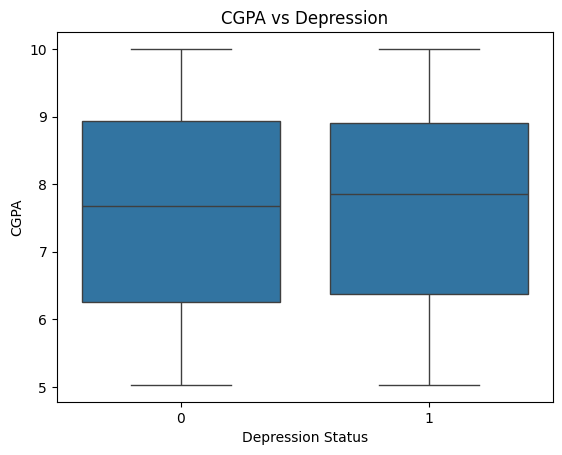

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Depression', y='CGPA', data=students_data)
plt.title("CGPA vs Depression")
plt.xlabel("Depression Status")
plt.ylabel("CGPA")
plt.show()

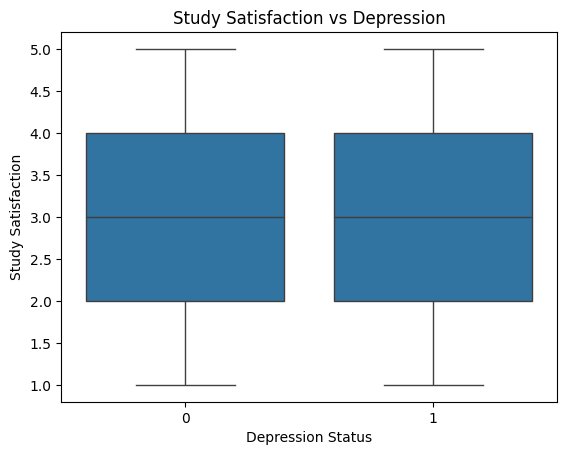

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Depression', y='Study Satisfaction', data=students_data)
plt.title("Study Satisfaction vs Depression")
plt.xlabel("Depression Status")
plt.ylabel("Study Satisfaction")
plt.show()

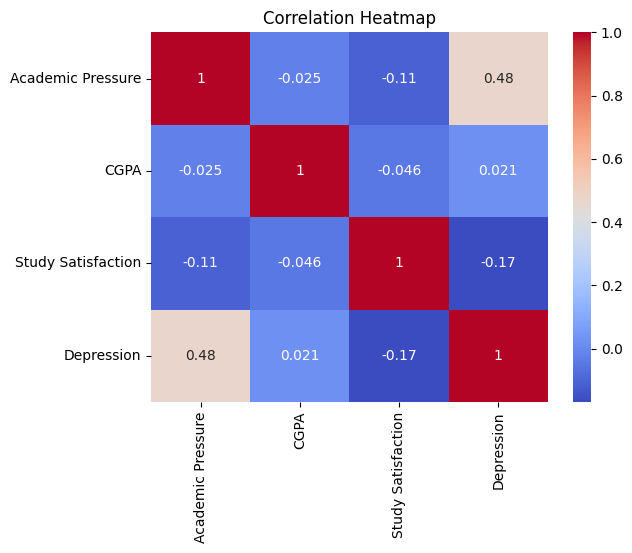

In [50]:
correlation_matrix = students_data[['Academic Pressure', 'CGPA', 'Study Satisfaction', 'Depression']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare the data
X = students_data[['Academic Pressure', 'CGPA', 'Study Satisfaction']].dropna()
y = students_data['Depression'][X.index]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Coefficients of the model
coefficients = pd.DataFrame({
    'Factor': X.columns,
    'Coefficient': model.coef_[0]
})
print(coefficients)

              precision    recall  f1-score   support

           0       0.70      0.61      0.65      3452
           1       0.75      0.81      0.78      4886

    accuracy                           0.73      8338
   macro avg       0.72      0.71      0.72      8338
weighted avg       0.73      0.73      0.73      8338

               Factor  Coefficient
0   Academic Pressure     0.815179
1                CGPA     0.049550
2  Study Satisfaction    -0.221570


Observations

- Academic Pressure is a clear marker for depression. Students reporting higher academic pressure are more likely to be depressed that those reporting lower academic pressure. This is also reflected in the correlation matrix(0.48)
- CGPA does not have significant impact on whether a person is depressed or not. Interestingly, students with higher CGPA have a marginal higher likelyhood to be depressed
- Study satisfaction has a negative relationship with depression. Increased study satisfaction decreases depression and vice versa

**Working Professionals**

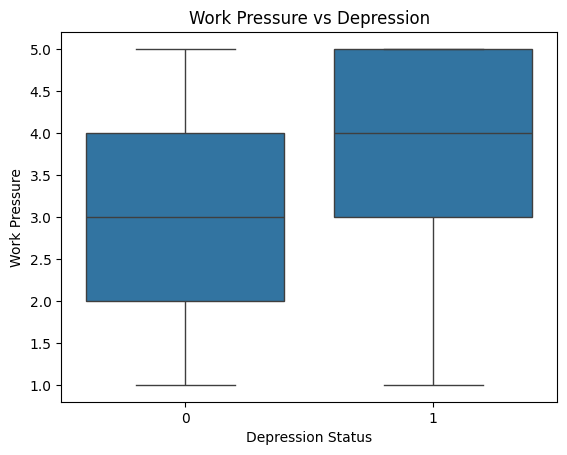

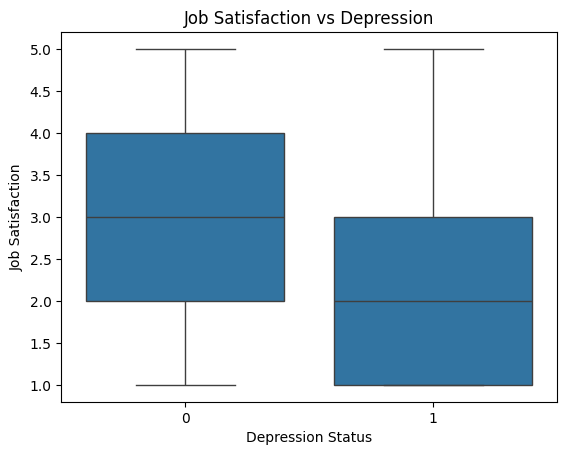

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of factors for working professionals
factors = ['Work Pressure', 'Job Satisfaction']

# Draw box plots for each factor
for factor in factors:
    sns.boxplot(x='Depression', y=factor, data=working_professionals_data)
    plt.title(f"{factor} vs Depression")
    plt.xlabel("Depression Status")
    plt.ylabel(factor)
    plt.show()

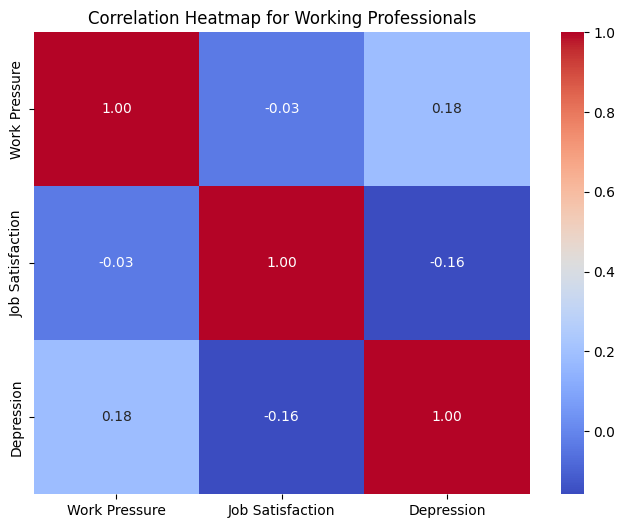

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation analysis
# Include 'Depression' and other numeric factors
correlation_matrix = working_professionals_data[['Work Pressure', 'Job Satisfaction', 'Depression']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap for Working Professionals")
plt.show()

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Prepare the data
X = working_professionals_data[['Work Pressure', 'Job Satisfaction']].dropna()
y = working_professionals_data['Depression'][X.index]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the logistic regression model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Coefficients of the model
coefficients = pd.DataFrame({
    'Factor': X.columns,
    'Coefficient': model.coef_[0]
})
print("\nCoefficients:")
print(coefficients)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     29359
           1       0.13      0.69      0.22      1775

    accuracy                           0.72     31134
   macro avg       0.55      0.70      0.52     31134
weighted avg       0.93      0.72      0.79     31134


Coefficients:
             Factor  Coefficient
0     Work Pressure     0.634790
1  Job Satisfaction    -0.503288


Observations
- There is a clear relationship between Work Pressure and Depression. People with high work pressure are more prone to depression
- Also, there is a negative relationship between Job satisfaction and depression. People with high satisfaction have low rates of depression and vice versa